Обобщение работы с новой задачей
1. Получить базовое решение
* Минимально познакомиться с данными
* Заполнить пропуски простым методом (нулями, медиана, среднее, мода...)
* Обучить простую модель (линейная, деревья...)
* Посчитать метрику качества
2. EDA
* Изучить целевую переменную 
    * регрессия - распределение, меры центральной тенденции
    * классификация - баланс классов
* Изучить признаки
    * корреляция
    * найти проблемные признаки
    * найти пропуски
    * найти выбросы
    * сгенерировать идеи по их заполнению
* Изучить влияние признаков на целевую переменную
    * корреляция
    * классификация - разделение значений в зависимости от классов
* Постоянно придумывать идеи для новых признаков (где-то их фиксировать)
3. Предобработка данных
* Разделить данные на train и test
* Зависит от выбранной модели
    * Масштабирование
* Заполнить пропуски
    1. Выкинуть эти данные
    2. Заменять разными методами (медианы, средние значения, бизнес-логика, строить модели...)
    3. Делать/не делать дополнительную фичу
    4. Ничего не делать
* Обработать выбросы
    1. Выкинуть эти данные
    2. Заменять разными методами (медианы, средние значения, бизнес-логика, строить модели...)
    3. Делать/не делать дополнительную фичу
    4. Ничего не делать
* Генерация новых признаков
    1. Категориальные признаки
        a. pd.get_dummies, OneHotEncoder
        b. Feature Encoding
        c. Target Encoding
    2. Вещественные признаки
        a. Feature discretization
        b. Feature binarization
* Оформить предобработку в класс/функции для воспроизводимости
4. Обучение и валидация моделей
* Обучить модель на базовых гиперпараметрах
* Вручную настраивать гиперпарметры
* Автоматизированный выбор гиперпараметров с кросс-валидацией GridSearchCV/RandomSearchCV
* Следить за переобучением, если оно появляется, то искать лучший параматер регуляризации
* Посчитать метрики
5. Воспроизводимость
* Зафиксировать результаты эксперимента
* Сохранить модели
* Сохранить версии библиотек
6. Вы и ваша модель идеальна! :)

Id - айди

age - возраст преподавателя

years_of_experience - стаж преподавателя

lesson_price - стоимость урока

qualification - квалификация преподавателя

physics - преподает ли физику

chemistry - преподает ли химию

biology - преподает ли биологию

english - преподает ли английский

geography - преподает ли географию

history - преподает ли историю

mean_exam_points - средний балл за экзамен учеников

choose - целевое значени, выбирать или нет преподавателя

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Пути к директориям и файлам

# input
TRAIN_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results_reg/train.csv'

# output
PREP_DATASET_PATH_TRAIN = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results_reg/Macerszmidt_1_reg.csv'


In [6]:
#Загрузка данных
df_train = pd.read_csv(TRAIN_DATASET_PATH)
print("Data is loaded!")

Data is loaded!


In [7]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [8]:
 df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [9]:
print(df_train.columns)

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')


In [10]:
features = list(df_train.loc[:, df_train.columns != 'Id'].corrwith(
    df_train['mean_exam_points']).abs().sort_values(ascending=False)[1:].index)

target = 'mean_exam_points'

In [11]:
#Разделим выборку на обучающую и тестовую

X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target],
                                                    test_size=0.25,
                                                    random_state=1)
X_train.shape, X_test.shape

((7500, 10), (2500, 10))

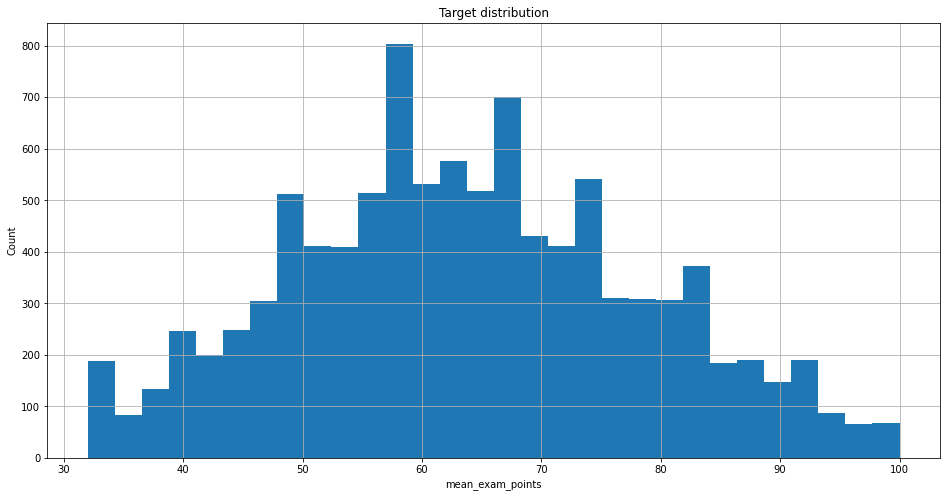

In [12]:
# Целевая переменная

plt.figure(figsize = (16, 8))

df_train['mean_exam_points'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('mean_exam_points')

plt.title('Target distribution')
plt.show()

In [13]:
df_train['qualification'].value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64

In [14]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [15]:
# Для начала отмасштабируем выборку
X_train = X_train.astype(float)

X_train = standard_scale(X_train)

X_train[:10]

,qualification,lesson_price,years_of_experience,physics,biology,geography,chemistry,english,age,history
651,-0.910510,0.573792,1.687004,1.291827,2.852037,-0.180629,-0.394240,-0.238279,-0.610511,-0.138411
6560,-0.910510,-0.567503,-0.554564,-0.773994,-0.350580,-0.180629,-0.394240,-0.238279,-0.361776,-0.138411
8974,-0.910510,-1.138150,1.126612,-0.773994,-0.350580,-0.180629,-0.394240,-0.238279,0.633163,-0.138411
2348,-0.910510,-0.282179,1.126612,-0.773994,-0.350580,-0.180629,-0.394240,-0.238279,-0.361776,-0.138411
5670,0.348027,0.954224,0.005828,-0.773994,2.852037,-0.180629,2.536187,-0.238279,1.006265,-0.138411
7454,-0.910510,-0.567503,-1.114956,1.291827,-0.350580,-0.180629,-0.394240,-0.238279,0.011326,-0.138411
3689,0.348027,0.098253,-1.114956,-0.773994,-0.350580,-0.180629,-0.394240,-0.238279,-0.237409,-0.138411
305,-0.910510,-1.803905,1.126612,-0.773994,-0.350580,-0.180629,-0.394240,-0.238279,-0.113042,-0.138411
7671,0.348027,0.764008,1.687004,-0.773994,-0.350580,-0.180629,-0.394240,-0.238279,-1.107981,-0.138411
5844,1.606564,2.095519,1.126612,1.291827,-0.350580,-0.180629,-0.394240,-0.238279,-0.237409,-0.138411


In [16]:
# Для начала отмасштабируем выборку
X_test = X_test.astype(float)

X_test = standard_scale(X_test)

X_test[:10]

,qualification,lesson_price,years_of_experience,physics,biology,geography,chemistry,english,age,history
9953,-0.901018,-0.481128,-1.140115,1.287987,-0.351491,-0.186425,-0.383054,-0.237935,0.647437,-0.147141
3850,0.372326,0.093056,-0.563834,-0.776095,-0.351491,-0.186425,-0.383054,-0.237935,0.274976,-0.147141
4962,0.372326,0.188753,-0.563834,-0.776095,-0.351491,-0.186425,-0.383054,-0.237935,0.399130,-0.147141
3886,1.645670,1.337121,0.588729,-0.776095,-0.351491,-0.186425,-0.383054,-0.237935,-0.594101,-0.147141
5437,-0.901018,-0.959614,-1.140115,-0.776095,-0.351491,-0.186425,-0.383054,-0.237935,-0.842408,-0.147141
8517,1.645670,1.050029,-0.563834,-0.776095,-0.351491,-0.186425,-0.383054,-0.237935,0.523283,6.793478
2041,0.372326,-0.098339,0.588729,-0.776095,-0.351491,-0.186425,-0.383054,-0.237935,-0.966562,-0.147141
1989,-0.901018,-0.385430,-1.140115,-0.776095,-0.351491,-0.186425,2.609555,-0.237935,-0.718254,-0.147141
1933,-0.901018,-0.576825,-0.563834,-0.776095,-0.351491,-0.186425,-0.383054,-0.237935,-0.842408,-0.147141
9984,1.645670,1.815607,1.165011,-0.776095,-0.351491,-0.186425,-0.383054,-0.237935,0.399130,-0.147141


In [17]:
def e_metrics(x1, x2):

    distance = sum(square(x1 - x2))

    return sqrt(distance)

In [18]:
import math

Реализуем алгоритм поиска k ближайших соседей.

In [19]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    # расчет расстояний от классифицируемых объектов до
    # объектов обучающей выборки
    #distances = math.sqrt(sum((x_test - x_train)**2))
    distances = (x_test - x_train)
                
    answers = []    
    for distance in distances:
        # Записываем в список значение расстояния и ответа на объекте обучающей выборки
        test_distances = [(dist, label) for dist, label in zip(distance, y_train)]
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            
            classes[d[1]] += w

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [20]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [21]:
k = 100

In [22]:
y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)


In [23]:
# Проверим работу алгоритма

# print(f'Точность алгоритма (без РСА) на трейне (без добавления весов для соседей) при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
# print(f'Точность алгоритма (без РСА) на тесте (без добавления весов для соседей) при k = {k}: {accuracy(y_pred, y_test):.3f}')

### - $w(d) = \frac{1}{d+a}$,

In [24]:
def weights_n_neighbor(i, d):
    return 1 / (d + 0.1)

In [25]:
# y_pred_train = knn(X_train, y_train, X_train, k, weights_n_neighbor)
# y_pred = knn(X_train, y_train, X_test, k, weights_n_neighbor)

# print(f'Точность алгоритма (без РСА) на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
# print(f'Точность алгоритма (без РСА) на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

In [26]:
# corr_with_target = df_train[[features] + [target]].corr().iloc[:-1, -1].sort_values(ascending=False)

# plt.figure(figsize=(10, 8))

# sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

# plt.title('Correlation with target variable')
# plt.show()

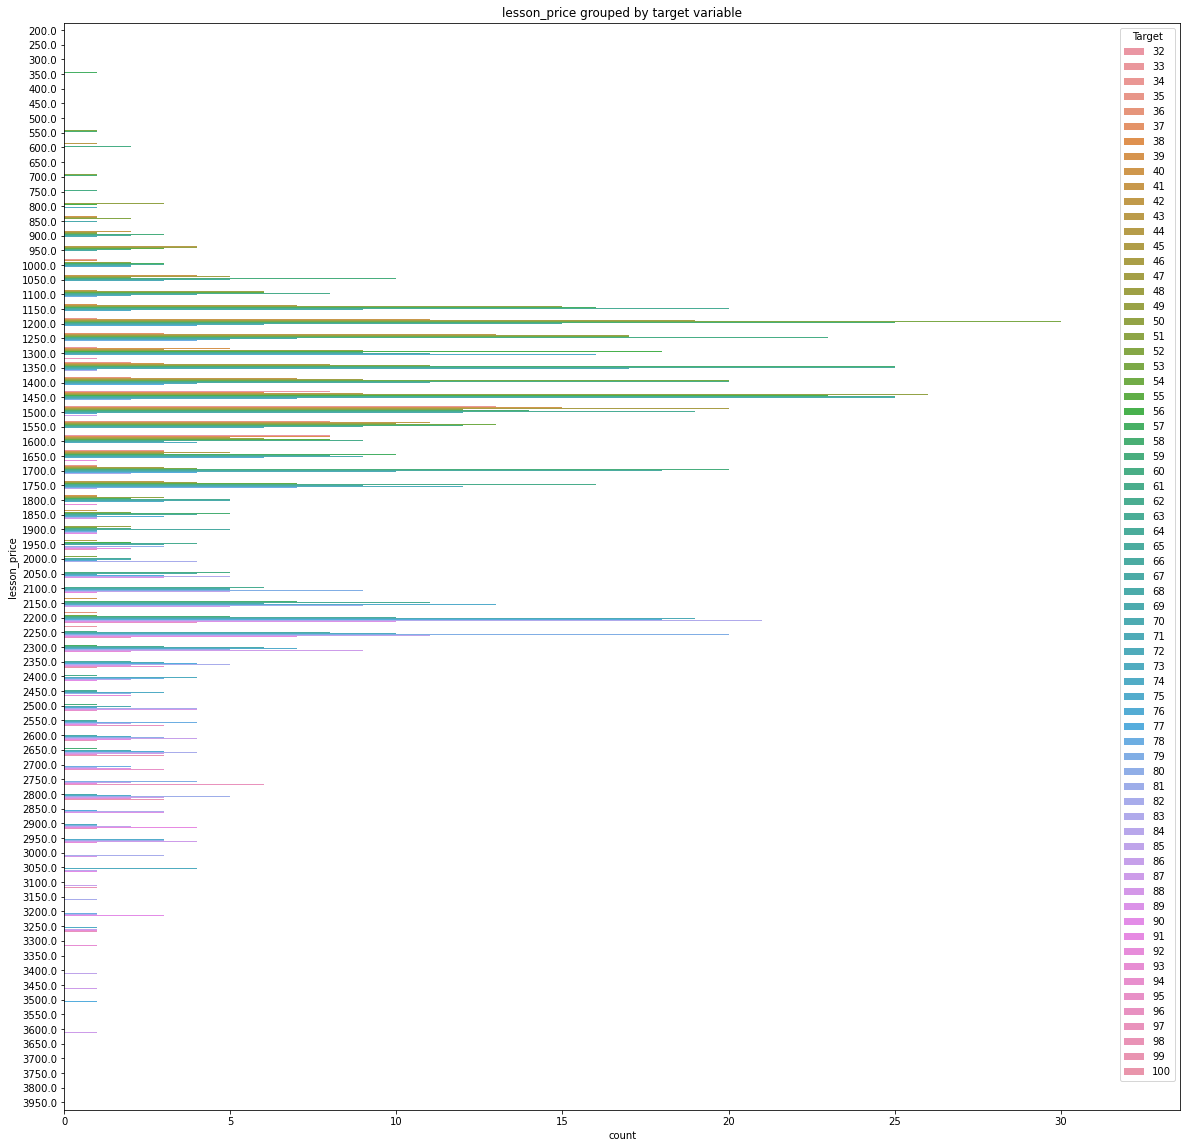

In [27]:
plt.figure(figsize=(20, 20))

sns.countplot(y="lesson_price", hue=target, data=df_train)
plt.title('lesson_price grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [28]:
df_train['Id'] = df_train.index

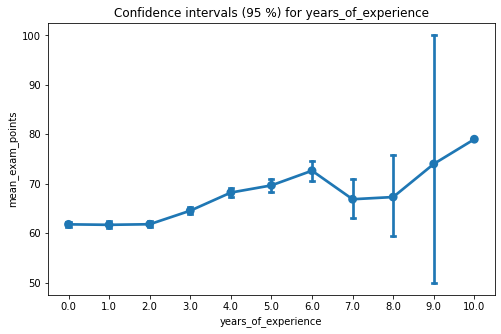

In [29]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='years_of_experience', y=target, data=df_train, capsize=.1)

plt.title('Confidence intervals (95 %) for years_of_experience')
plt.show()

In [30]:
corr_matrix = df_train[features].corr()
corr_matrix

,qualification,lesson_price,years_of_experience,physics,biology,geography,chemistry,english,age,history
qualification,1.000000,0.790087,0.194097,0.007529,-0.007504,0.003610,-0.002683,-0.008047,-0.000976,-0.005109
lesson_price,0.790087,1.000000,0.248311,-0.006432,-0.004860,0.010525,0.005130,-0.012018,-0.005462,-0.001142
years_of_experience,0.194097,0.248311,1.000000,0.008451,-0.001722,-0.011129,0.004246,-0.010241,0.059947,0.018640
physics,0.007529,-0.006432,0.008451,1.000000,0.000661,0.001904,0.019852,0.004238,0.004045,0.004867
biology,-0.007504,-0.004860,-0.001722,0.000661,1.000000,-0.013042,0.007866,0.010146,-0.005026,0.010995
geography,0.003610,0.010525,-0.011129,0.001904,-0.013042,1.000000,-0.004447,-0.008148,0.013130,-0.005049
chemistry,-0.002683,0.005130,0.004246,0.019852,0.007866,-0.004447,1.000000,0.009974,0.001250,-0.008079
english,-0.008047,-0.012018,-0.010241,0.004238,0.010146,-0.008148,0.009974,1.000000,-0.012546,-0.004560
age,-0.000976,-0.005462,0.059947,0.004045,-0.005026,0.013130,0.001250,-0.012546,1.000000,0.010606
history,-0.005109,-0.001142,0.018640,0.004867,0.010995,-0.005049,-0.008079,-0.004560,0.010606,1.000000


In [31]:
corr_matrix = np.round(corr_matrix, 2)
corr_matrix

,qualification,lesson_price,years_of_experience,physics,biology,geography,chemistry,english,age,history
qualification,1.00,0.79,0.19,0.01,-0.01,0.00,-0.00,-0.01,-0.00,-0.01
lesson_price,0.79,1.00,0.25,-0.01,-0.00,0.01,0.01,-0.01,-0.01,-0.00
years_of_experience,0.19,0.25,1.00,0.01,-0.00,-0.01,0.00,-0.01,0.06,0.02
physics,0.01,-0.01,0.01,1.00,0.00,0.00,0.02,0.00,0.00,0.00
biology,-0.01,-0.00,-0.00,0.00,1.00,-0.01,0.01,0.01,-0.01,0.01
geography,0.00,0.01,-0.01,0.00,-0.01,1.00,-0.00,-0.01,0.01,-0.01
chemistry,-0.00,0.01,0.00,0.02,0.01,-0.00,1.00,0.01,0.00,-0.01
english,-0.01,-0.01,-0.01,0.00,0.01,-0.01,0.01,1.00,-0.01,-0.00
age,-0.00,-0.01,0.06,0.00,-0.01,0.01,0.00,-0.01,1.00,0.01
history,-0.01,-0.00,0.02,0.00,0.01,-0.01,-0.01,-0.00,0.01,1.00


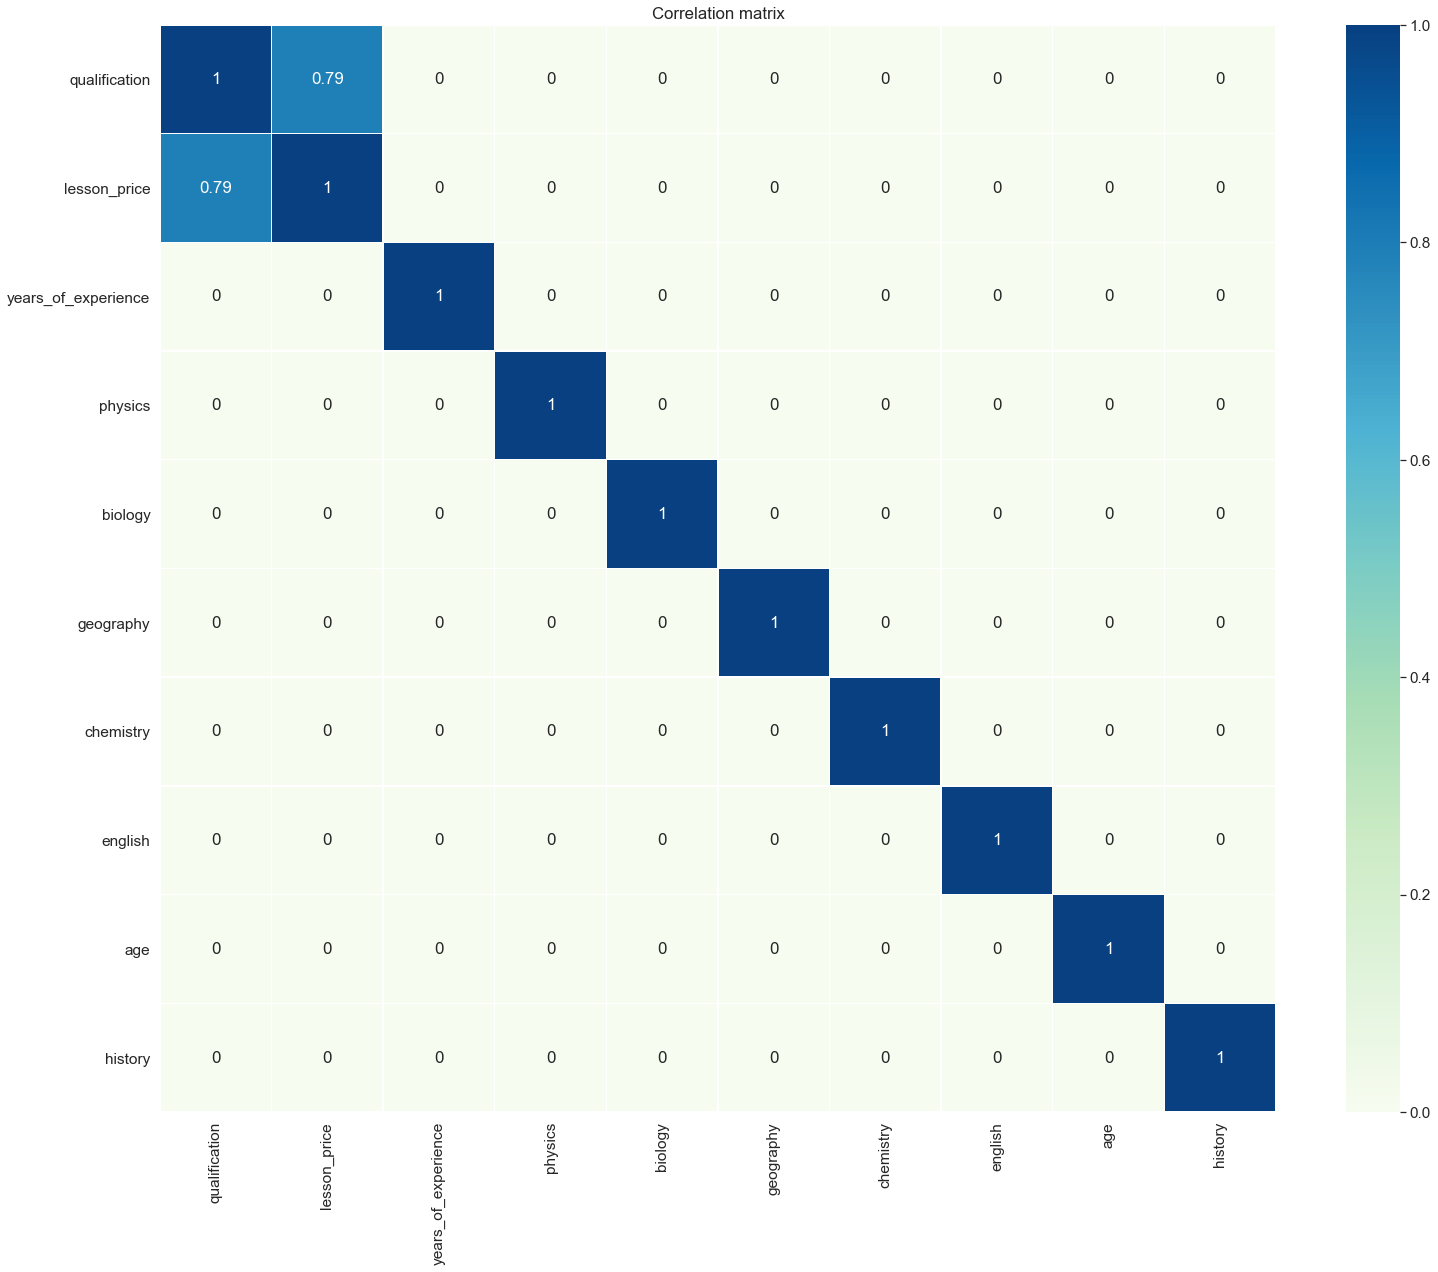

In [32]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = df_train[features].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

**Проверим распределения вещественных признаков на трейне и тесте**

qualification


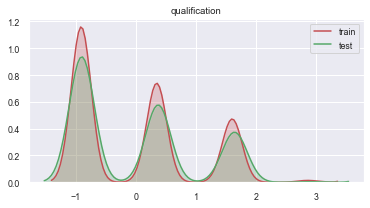

lesson_price


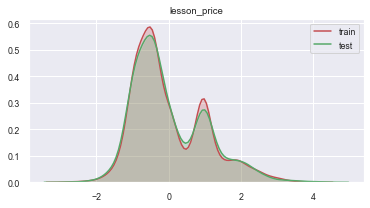

years_of_experience


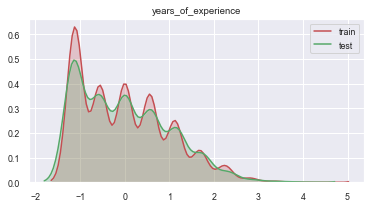

physics


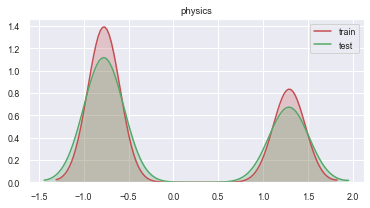

biology


/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


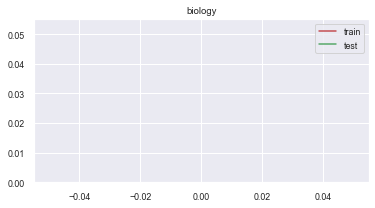

/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


geography


/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


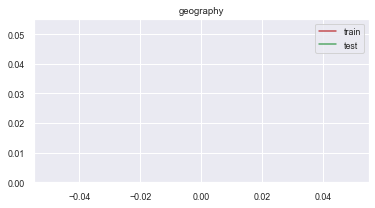

chemistry


/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


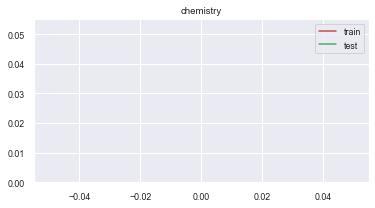

/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


english


/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


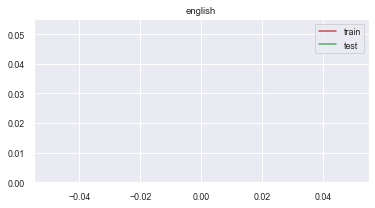

age


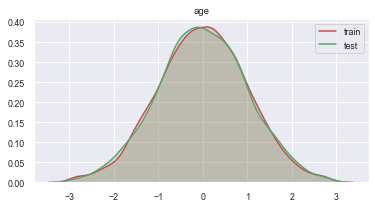

history


/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


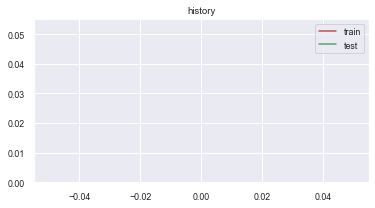

In [33]:
# p> 5% - распределения похожи
figsize = (6, 3)
for col in features:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(X_train[col], shade=True, label='train', color='r')
    sns.kdeplot(X_test[col], shade=True, label='test', color='g')
    print(col)
#     print(mannwhitneyu(X_train[col], X_test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

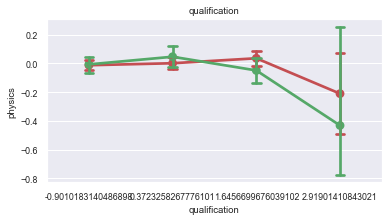

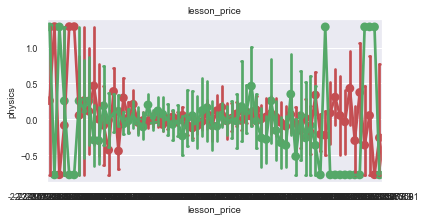

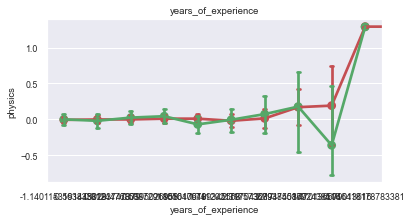

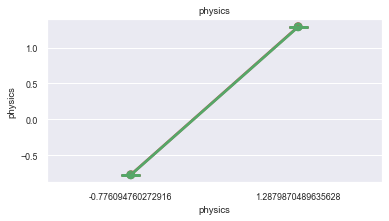

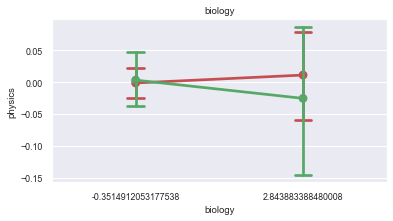

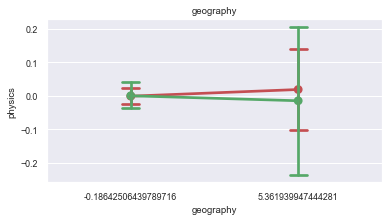

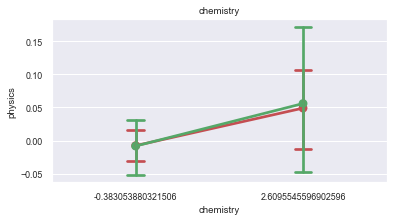

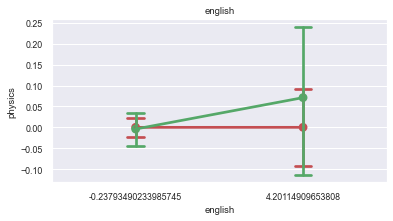

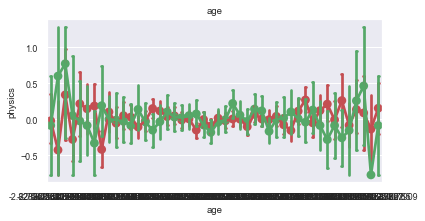

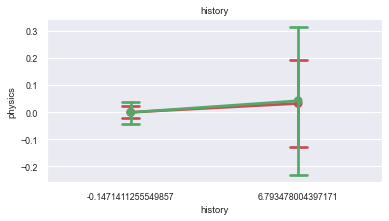

In [34]:
num_feature = 'physics'
for col in features:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=X_train, capsize=.1, label='train', color='r')
    sns.pointplot(x=col, y=num_feature, data=X_test, capsize=.1, label='test', color='g')
    plt.title(col) 
    plt.show()

In [35]:
print(df_train.columns)

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')


**Сократим количество значений в признаке**

In [36]:
df_train['age'].unique()

array([40., 48., 39., 46., 43., 33., 53., 60., 49., 34., 50., 42., 45.,
       54., 57., 52., 58., 55., 44., 35., 41., 47., 51., 56., 63., 31.,
       38., 65., 66., 36., 64., 62., 68., 32., 30., 37., 23., 29., 59.,
       24., 61., 28., 27., 26., 67., 25.])

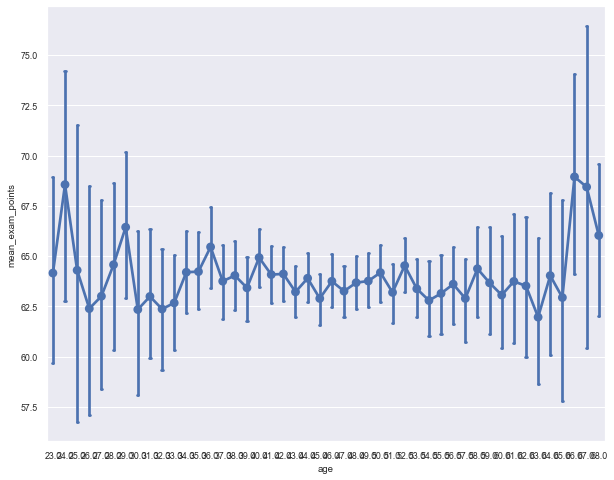

In [37]:
plt.figure(figsize=(10, 8))

sns.pointplot(x='age', y='mean_exam_points', data=df_train, capsize=.1,);

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [42]:
my_classifier = RandomForestClassifier()
my_classifier.fit(X_train, y_train)
y_pred = my_classifier.predict(X_test)

In [46]:
y_pred

array([53, 52, 73, ..., 43, 54, 76])

Результаты работы драфта модели: 
              precision    recall  f1-score   support

          32       0.07      0.12      0.09        26
          33       0.00      0.00      0.00         9
          34       0.00      0.00      0.00        13
          35       0.11      0.20      0.14        10
          36       0.11      0.09      0.10        11
          37       0.00      0.00      0.00         8
          38       0.00      0.00      0.00        22
          39       0.00      0.00      0.00        19
          40       0.00      0.00      0.00        18
          41       0.00      0.00      0.00        33
          42       0.04      0.06      0.04        17
          43       0.00      0.00      0.00        26
          44       0.00      0.00      0.00        23
          45       0.05      0.03      0.03        38
          46       0.00      0.00      0.00        34
          47       0.07      0.06      0.07        48
          48       0.02      0.02      0.02    

Text(0.5, 13.5, 'Мы предсказали')

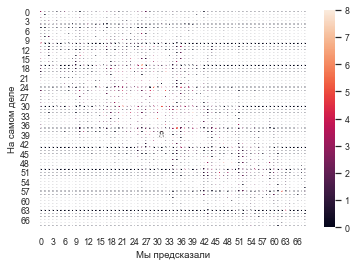

In [43]:
print("Результаты работы драфта модели: ")
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', linewidth=1, cbar=True)
plt.ylabel("На самом деле")
plt.xlabel("Мы предсказали")